# Predicting material formation energy from material composition

*Mehdi Cherti, Akin Kazakci (Mines ParisTech, Paris Science et Lettre Research University)*

**Disclaimer**. This notebook has been produced and distributed for collaborative data challenge [RAMP](https://ramp.studio/) as part of the course material for [Large-Scale Machine Learning](http://members.cbio.mines-paristech.fr/~jvert/svn/lsml/lsml18/) of PSL Research University.

### Flow of this document

1. Introduction and Background
2. Objective
3. Working with RAMP
4. Data 
5. Baseline solutions

## Introduction and Background

The discovery of new materials has always been critical to the human development. History has shown that, for a given technology domain, once the right material is discovered dramatic advances will ensue rapidly (e.g. steel for steam engines, semiconductors for ICT). At a time where global warming continues at an [alarming rate](https://www.nature.com/articles/d41586-018-07586-5), such advances are desperately needed today in clean energy technologies. "Depending on which model you choose, we have minus 10 or plus 40 years to solve the problem" (Ceder, 2010).
The imperative to make big leaps and bounds in cleantech is exacerbated by the very fact that commercializing a new material might take roughly up to two decades (Eager, 1995 via Ceder, 2010).

Chief among the application domains where new materials are needed are energy storage and conversion devices, such as batteries and photovoltaics, superconductors, thermoelectrics and hydrogen production and storage technologies. Despite the variety of these applications, the theoretical basis that governs the properties of existing and candidate materials is the same and is rooted in quantum chemistry. Indeed, when it comes to energy-related applications understanding electro-chemical properties of materials is of particular interest.

On the theoretical level, this theory is well understood. As early as 1929, Dirac stated that "the underlying physical law necessary for the mathematical theory of a large part of physics and the whole of chemistry are completely [...] known". However, "the exact application of these laws leads to equations much more complicated to be soluble" (Dirac 1929). Indeed, these physical laws governing the behavior of a material are captured by Schrödinger equation. Today, even though we have astounding amounts of computing power, models derived from Schrödinger equation are still depressingly slow to compute. 

Given the estimated size of the chemical space is on the order of $10^{60}$ it still is not feasible to compute these models for the totality of the chemical combinations. Jain *et al.* (2016) gives an example: 1 gram of any material contains on the order of $10^{23}$ electrons. Solving Schrödinger equation  for this stystem using a computer would require approximately 1 billion petabytes of computing space (Jain *et al.*, 2016). Even if this memory problem could have been solved, it would still required to solve ~$10^{46}$ pairwise electron interactions - that would require a period roughly equivalent to the age of the universe.

Given the required computing time&resources and the size of the search space, it is obviously not possible to proceed to an exhaustive verification. Traditionnally, we rely on chemists and material scientists' intuition and knowledge to generate a new candidate material whose properties need to be verified by further analysis and experimental measurements. Given the severe time constraints humanity has for eliminating global warming, it may be argued that a change in strategy is needed. 

The traditional approach can indeed be complemented by a data-driven, computational approach - that allows collecting and sharing information, enabling researchers to write code that will accelerate search based on the data. In fact, over the last decade, many such projects have been started such as [ICDS](http://www2.fiz-karlsruhe.de/icsd_general_information.html) or  [OQMD](http://oqmd.org/). These datasets systematically collects and make available valuable information and results discovered or computed by various researchers. Some projects such as [Materials Project](https://materialsproject.org/) are using vast computation resources to compute fundamental quantities such as ground-state energies of various compounds using models derived from density functional theory (see below) and augment the material databases - in an effort to reduce the computation that needs to be done by any individual researcher. 

Having these databases and information available for anyone ensure better reproductibility and efficiency, as it eliminates the need for redundant work and computation. Based on such datasets and information therein, it is possible to design *high-throughput* systems where various criteria can be used to query datasets containing hundreds of thousands of compounds for further automating the experiments and synthesis-related work.

A further step in this direction is the use of machine learning models in this increasingly computational workflows. Three types of applications already appear in the literature:
-  Using (data-driven) predictive models to replace more costly computing processes (such as DFT or molecular dynamics simulations)
-  Using predictive models to estimate properties of never-before-seen materials ( -- the purpose of this RAMP)
-  Using predictive models to choose which material to simulate by more costly (and accurate) methods

In this RAMP, we shall consider the second category of problems and develop predictive models of [formation energy](https://en.wikipedia.org/wiki/Standard_enthalpy_of_formation) for 10 binary systems that will not be seen during algorithmic training.

### Density Functional Theory

Schrödinger equation describe systems as a many-body electron-electron problem - which remains intractable for any system of interest. To make the problem tractable, [Density functional theory](https://en.wikipedia.org/wiki/Density_functional_theory) reduces it to a one-body problem, where one electron is considered at a time and initial guess of fundamental quantities such as the charge density are iteratively refined to reach ground-state properties of a system - using "functionals" (a functions of functions) capturing fundamental properties of materials such as charge density and electron-exchange behaviors. 

The class of computation methods derived from Density functional theory are often called *ab initio* (from scratch). Although the results are sensitive to the initial choice of functionals and there are systems for which the method is known to perform poorly, there exist a large number of systems for which important quantities can be computed reliably with DFT methods. Inputs to DFT includes the coordinates and identities of atoms in the material, the lattice structure, the exchange-correlation functional, various parameters and algorithms. Outputs quantities include electronic charge density, total energy, magnetic configuration and electronic band structure - all of which are fundamental quantities that enable deriving application-related properties of a candidate material.



### References

The following references have been used to set up this RAMP. You may find them useful to reach a deeper understanding about *ab initio* approaches, DFT and more specifically, the prediction of formation enthalpy. 

-  Jha, Dipendra, et al. "Elemnet: Deep learning the chemistry of materials from only elemental composition." Nature 8.1 (2018): 17593.
-  Ward, Logan, et al. "A general-purpose machine learning framework for predicting properties of inorganic materials." npj Computational Materials 2 (2016): 16028.
-  Ceder, Gerbrand. "Opportunities and challenges for first-principles materials design and applications to Li battery materials." MRS bulletin 35.9 (2010): 693-701.
-  Jain, Anubhav, Yongwoo Shin, and Kristin A. Persson. "Computational predictions of energy materials using density functional theory." Nature Reviews Materials 1.1 (2016): 15004.


## Objective

Although *ab initio* DFT computing of materials provides a principled way of computing energy-related properties of materials it is quite slow (on the order of weeks). Instead, machine learning methods can provide predictions on the order of miliseconds to seconds. Therefore, in a context of high throughput computing, a sufficiently good predictor can be used initially to screen the chemical space to focus the search on materials that are likely possess desirable properties - therefore accelerating the overall search for a new material.  

In this RAMP, we are going to predict the [formation enthalpy](https://en.wikipedia.org/wiki/Standard_enthalpy_of_formation) $\Delta{H}_f$, based previously computed $\Delta{H}_f^j$ for a known set of compunds $C^j$. 

Note that $\Delta{H}_f$ is a continuous quantity, thus, this is a regression problem. Following (ref elemnet), we will be using [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error) as the objective function:
$$\text{MAE} = \frac{1}{n}\sum_{t=1}^{n}|\Delta{H}_f - \hat{\Delta{H}_f}| = \frac{1}{n}\sum_{k=1}^{n}\left|{y-\hat{y}}\right|$$



where:

- $y$ is the true formation energy
- $\hat{y}$ is the predicted formation energy
- $n$ is the number of examples.




Note that predicting formation enthalpies of compounds whose formation enthalpies have already been computed by *ab initio* methods are of limited use, except the speed improvement for screening purposes. The regressor would be much more useful if it can accurately predict the energies of compounds never before seen during training. This is, however, more likely to have larger errors in prediction.

In order to estimate the ability of the model predict the energies of compounds such new seen, we shall test your model on combinations of molecules never seen in the training, using the following scheme:

- for each pair (atom1, atom2) of atoms:

    - train the model on examples (compounds) which contain atom1 only, or atom2 only, or none of them
    - test the model on examples (compounds) which contain both atom1 and atom2

You will be tested on the following 10 pairs of atoms:

```
    ("Li", "O"),
    ("Cu", "Zn"),
    ("Cr", "Zn"),
    ("Co", "Zn"),
    ("Cu", "Ge"),
    ("Cu", "Si"),
    ("Al", "Cu"),
    ("Cu", "Mg"),
    ("Fe", "O"),
    ("Fe", "Zn"),
```

Each pair (atom1, atom2) will provide an $\text{MAE}$ test score on the leaderboard.
Thus, a total of 10 scores will be displayed on the leaderboard.

The overall score will be the average of those 10 scores. Your goal will be to minimize that overall score, but pay close attention to errors from each binary system - since it might give you insights about what type of atom combinations increase your overall errors. This, in turn, is potentially useful to engineer features that will hopefully help your predictor to reduce that error. You might want to use the excellent *[MatMiner](https://hackingmaterials.github.io/matminer/featurizer_summary.html)* package to either use existing features, or to build new ones.

## Working with RAMP

Working with RAMP involves two intertwined steps. You can use this starting kit and [Colab](https://colab.research.google.com) to freely explore and study. Once you think you have a model worth submitting, you can submit it to [RAMP](http://35.237.30.43/events/materials_formation_energy_prediction_mines_2019/sandbox) under the event "Material formation energy prediction"

You will be provided instructions Once you find a good model, you can submit it to the RAMP.

**For Colab**
Colab is a work environment provideded by Google Research. You can upload a Notebook (such as this one) and data, and start working. Note that Colab is not for large computation and extended work sessions. When you execute a model, if it takes more than a day, the computation might be stopped by Google on short notice (risk of loosing intermediate results). Thus, the best way to work with Colab for this RAMP is to simply test your ideas with a sufficient (but not very large) subset of data - to get quick feedback on your idea and also to make sure your code is flawless (and will not crash RAMP server).

**For RAMP:**

1) Go to http://35.237.30.43/events/materials_formation_energy_prediction_mines_2019/sandbox
(Sign up if necessary, it might take a moment before we validate your registration)

2) Copy the feature extractor cell (from this notebook) and paste it on the web site

3) Copy the regressor cell (from this notebook) and paste it on the web site

4) Click "Save"

5) Choose a name for the submission

6) Click "Submit"

7) Optionally assign credits (they must sum up to 100)

8) Wait for the training to finish (check the leaderboard)

Note that training *will* take time. It is normal that you will not see your model on the leaderboard immediately. The best thing to do while a model is training is to... prepare your next model.

## Data

In this RAMP, we shall use data from [OQMD](http://oqmd.org/) where DFT outputs has been precomputed for several tens of thousands of compounds. Let us start by importing a few libraries and utilities we shall use for exploring the data.

In [2]:
%matplotlib inline
from collections import defaultdict
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import pymatgen as mg
from matminer.featurizers.composition import ElementProperty
from sklearn.model_selection import cross_val_score
sns.set(style='white')

In [3]:
df = pd.read_csv("data/train.csv")

In [4]:
df.head()

,formula,formation_energy_per_atom
0,Al0.250000V0.500000Tm0.250000,0.293351
1,Mg0.250000Sm0.250000U0.500000,0.845070
2,Co0.250000Tc0.250000Sb0.250000Hg0.250000,0.453491
3,K0.500000Zn0.250000Rh0.250000,0.678913
4,Be0.500000Sr0.250000Sm0.250000,0.413558


## Basic properties of a molecule

The packages [pymatgen](http://pymatgen.org/) and [matminer](https://hackingmaterials.github.io/matminer/) give you several methods to manipulate molecules and atoms.

In [5]:
comp = mg.Composition("Si0.250000Ga0.500000Tb0.250000")
print(comp["Si"], comp["Ga"], comp["Tb"])
print(comp.weight)
print(comp.average_electroneg)
print(comp.total_electrons)

0.25 0.5 0.25
81.61421250000001 amu
1.6549999999999998
35.25


### Frequency of atoms

In [6]:
compositions = df.formula.apply(mg.Composition).values

In [7]:
atoms_unique = set(str(atom) for comp in compositions for atom in comp.keys())
atoms_unique

{'Ac',
 'Ag',
 'Al',
 'As',
 'Au',
 'B',
 'Ba',
 'Be',
 'Bi',
 'Br',
 'C',
 'Ca',
 'Cd',
 'Ce',
 'Cl',
 'Co',
 'Cr',
 'Cs',
 'Cu',
 'Dy',
 'Er',
 'Eu',
 'F',
 'Fe',
 'Ga',
 'Gd',
 'Ge',
 'H',
 'Hf',
 'Hg',
 'Ho',
 'I',
 'In',
 'Ir',
 'K',
 'Kr',
 'La',
 'Li',
 'Lu',
 'Mg',
 'Mn',
 'Mo',
 'N',
 'Na',
 'Nb',
 'Nd',
 'Ni',
 'Np',
 'O',
 'Os',
 'P',
 'Pa',
 'Pb',
 'Pd',
 'Pm',
 'Pr',
 'Pt',
 'Pu',
 'Rb',
 'Re',
 'Rh',
 'Ru',
 'S',
 'Sb',
 'Sc',
 'Se',
 'Si',
 'Sm',
 'Sn',
 'Sr',
 'Ta',
 'Tb',
 'Tc',
 'Te',
 'Th',
 'Ti',
 'Tl',
 'Tm',
 'U',
 'V',
 'W',
 'Xe',
 'Y',
 'Yb',
 'Zn',
 'Zr'}

In [11]:
len(atoms_unique)

86

In [12]:
atom_count = defaultdict(int)
for comp in compositions:
    for atom in comp.keys():
        atom_count[str(atom)] += 1
atom_count = pd.Series(atom_count)
atom_count = atom_count.sort_values(ascending=True)

In [13]:
atom_count.head(30)

Kr       2
Xe      20
Br     655
I      688
Se    1151
Cl    1161
F     1242
N     1274
C     1300
P     1394
H     1436
S     1795
Pu    4989
Np    5029
Pa    5044
U     5107
Pm    5157
Ac    5159
Cs    5300
Tm    5307
Th    5314
Ca    5454
Ho    5462
Dy    5489
Eu    5503
Tb    5511
Yb    5535
Sm    5548
Er    5561
Gd    5568
dtype: int64

Text(0, 0.5, 'atom')

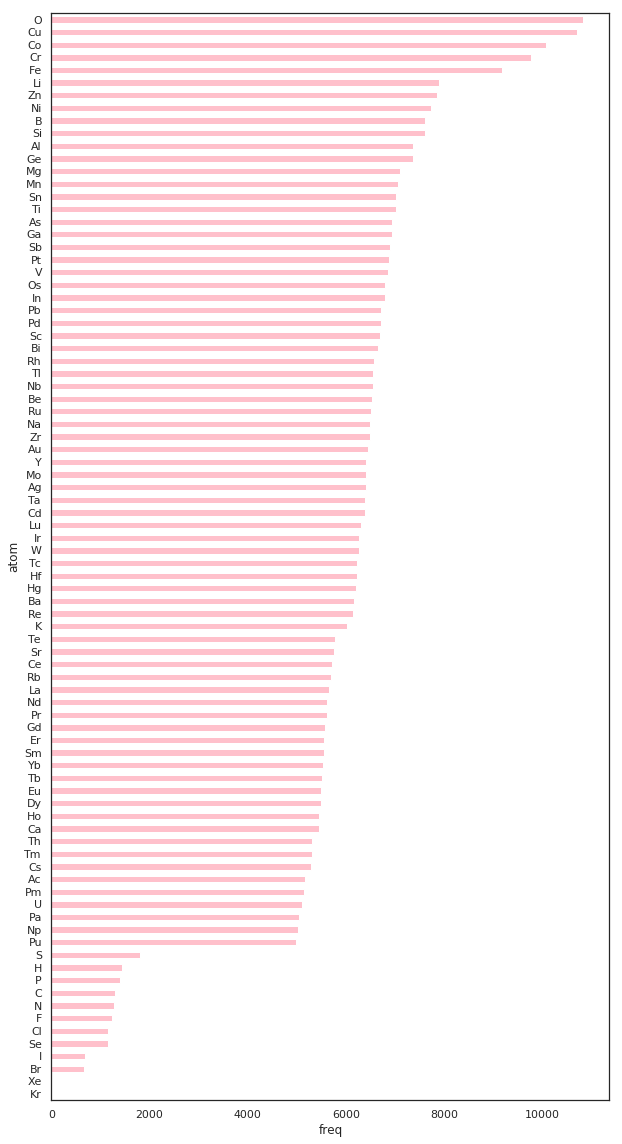

In [14]:
fig = plt.figure(figsize=(10, 20))
atom_count.plot(kind="barh", color="pink")
plt.xlabel("freq")
plt.ylabel("atom")

In [15]:
atom_pairs_count = defaultdict(int)
for comp in compositions:
    for atom1, atom2 in combinations(comp.keys(), 2):
        atom1 = str(atom1)
        atom2 = str(atom2)
        if atom1 > atom2:
            atom2, atom1 = atom1, atom2
        atom_pairs_count[(atom1, atom2)] += 1
atom_pairs_count = pd.Series(atom_pairs_count)
atom_pairs_count = atom_pairs_count.sort_values(ascending=True)

In [16]:
atom_pairs_count

S   Xe       1
P   Xe       1
Cr  Xe       1
Be  Se       1
H   Xe       1
I   Xe       1
P   Pu       1
Tc  Xe       1
Kr  Sb       1
Pm  S        1
Ba  Xe       1
Os  Xe       1
F   Pm       1
Bi  Kr       1
Cu  Xe       1
Au  Xe       1
N   Tb       1
Pa  Se       1
    S        2
C   Pm       2
Br  Er       2
Ac  N        2
P   Pa       2
H   Tm       2
Cl  Pa       2
H   Pm       2
Br  Tm       2
Ac  Br       2
F   Kr       2
Pm  Se       2
          ... 
Cr  Si     491
Al  Co     493
B   Cu     501
Cu  Li     505
    V      507
O   Sr     512
Cu  In     515
    Ga     516
Mn  O      521
Fe  Zn     527
As  Cu     528
Co  Si     532
    Ga     534
Cu  O      545
B   Ni     549
    Co     550
Co  Ge     553
O   P      556
Al  Cu     557
Cu  Sn     566
    Ge     568
    Si     578
K   O      594
Ba  O      670
Co  Zn     681
Na  O      682
Cr  Zn     694
Cu  Zn     777
H   O      797
Li  O     1238
Length: 3504, dtype: int64

Text(0, 0.5, 'atom pairs')

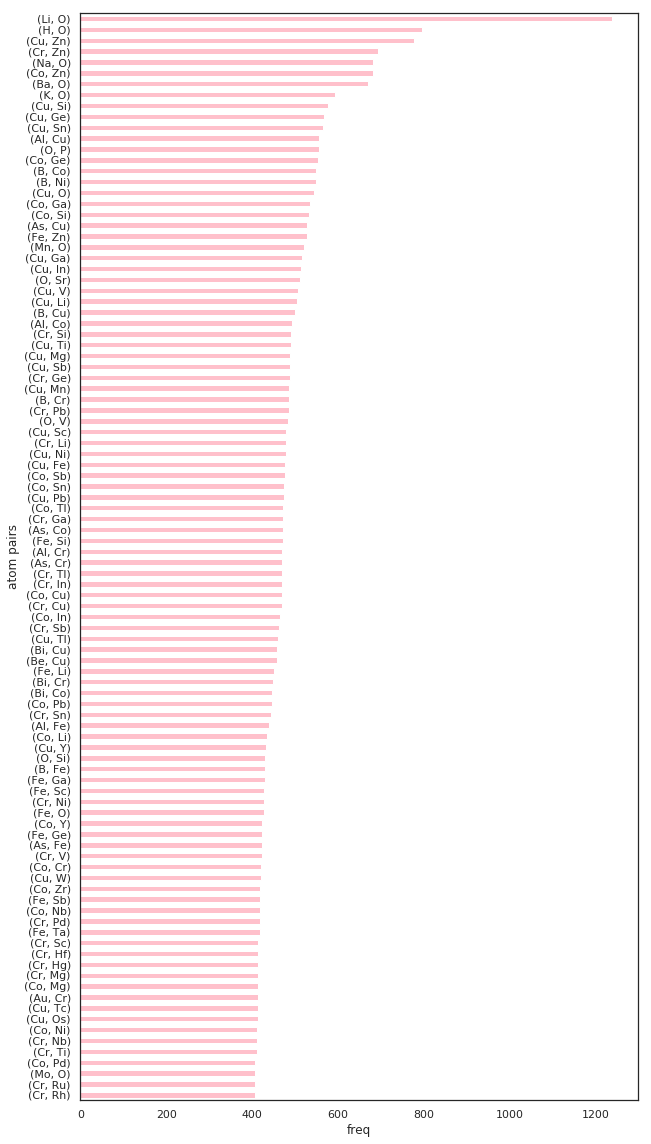

In [17]:
fig = plt.figure(figsize=(10, 20))
atom_pairs_count.tail(100).plot(kind="barh", color="pink")
plt.xlabel("freq")
plt.ylabel("atom pairs")


### Formation Energy Stats


In [18]:
df.formation_energy_per_atom.describe()

count    161672.000000
mean          0.002133
std           0.830697
min          -4.160704
25%          -0.246500
50%           0.110706
75%           0.439526
max           4.011125
Name: formation_energy_per_atom, dtype: float64

/home/ubuntu/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning:


Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



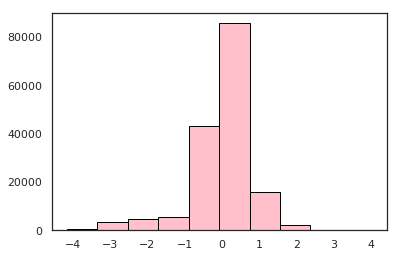

In [19]:
df.formation_energy_per_atom.hist(color="pink", edgecolor="black")
plt.grid("off")

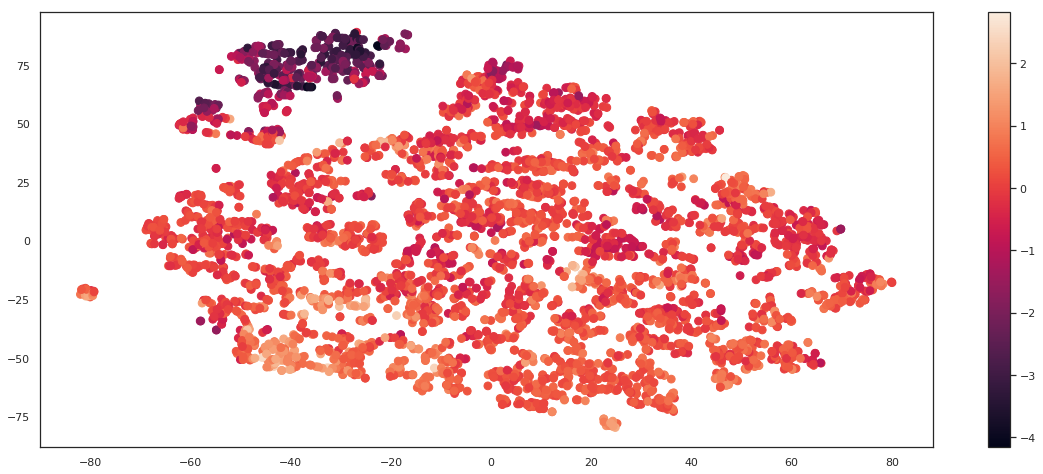

In [43]:
feature_calculators = ElementProperty.from_preset("magpie")                 
nb=5000
X = feature_calculators.transform(compositions[0:nb])
X = np.array(X)
X = (X - X.mean(axis=0, keepdims=True)) / (X.std(axis=0, keepdims=True))
sne = TSNE()
u = sne.fit_transform(X)
fig = plt.figure(figsize=(20, 8))
plt.scatter(u[:,0], u[:,1], c=df.formation_energy_per_atom.values[0:nb], s=60)
plt.colorbar()
plt.show()

In [20]:
df.sort_values(by="formation_energy_per_atom").head(20)

,formula,formation_energy_per_atom
112397,O0.600000La0.200000Lu0.200000,-4.160704
159753,O0.600000Sc0.200000Nd0.200000,-4.160270
57978,F0.714300K0.071400Tb0.214300,-4.159190
60496,O0.600000Al0.200000Ho0.200000,-4.158547
111718,O0.333300F0.333300Y0.333300,-4.154916
141347,O0.600000Er0.200000Ac0.200000,-4.152075
60657,F0.785700Zr0.142900Pr0.071400,-4.139734
57446,O0.600000Ti0.200000Ac0.200000,-4.137322
113457,F0.666700Ba0.333300,-4.135521
138942,F0.666700Mg0.166700Eu0.166700,-4.123845


In [21]:
elements = sorted(list(atoms_unique))
compositions = df.formula.apply(mg.Composition).values
energies = df.formation_energy_per_atom.values
D = pd.DataFrame([
    {"atom": str(atom), "energy": energy} 
    for comp, energy in zip(compositions, energies) for atom in comp.keys()
])
D.head()

,atom,energy
0,Al,0.293351
1,V,0.293351
2,Tm,0.293351
3,Mg,0.845070
4,Sm,0.845070


Text(0, 0.5, 'Mean formation energy of compositions that contain an atom')

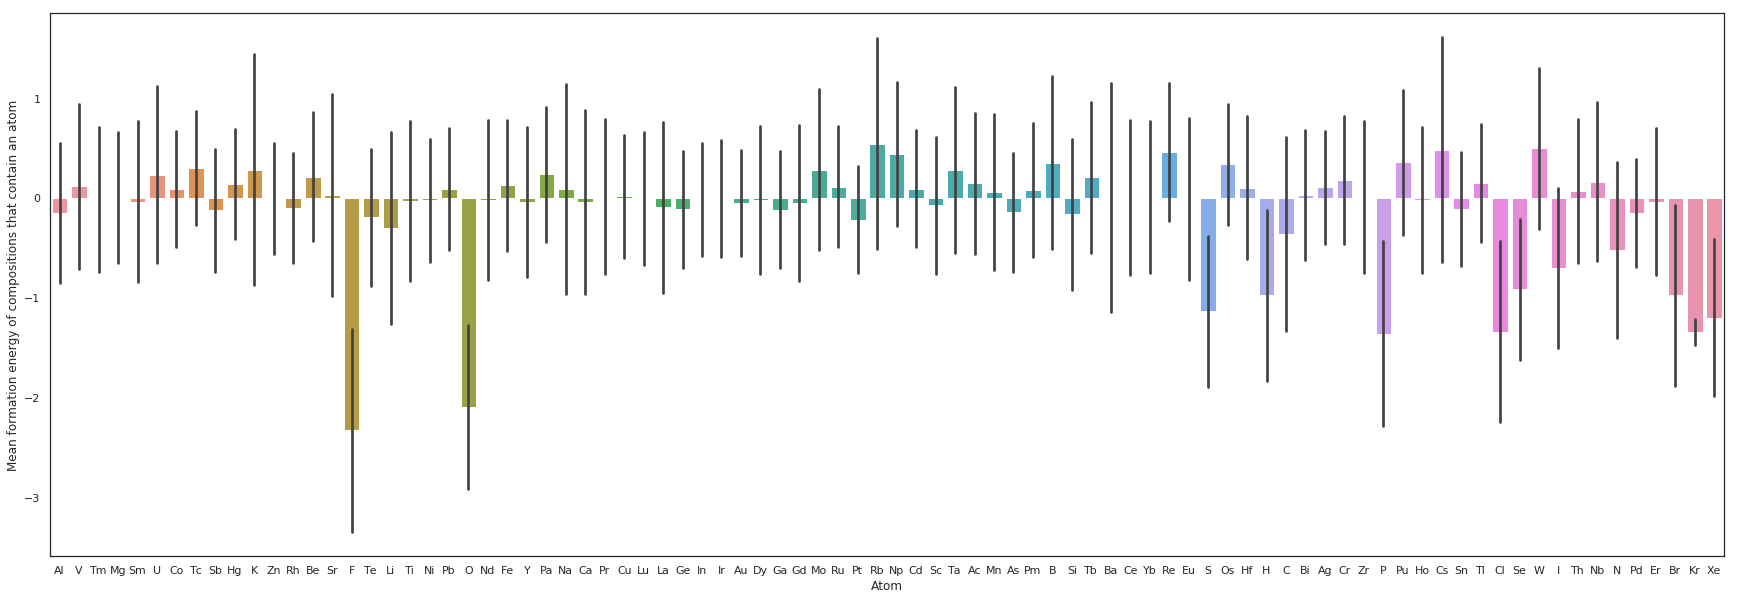

In [22]:
fig = plt.figure(figsize=(30, 10))
sns.barplot(x="atom", y="energy", data=D, ci="sd")
plt.xlabel("Atom")
plt.ylabel("Mean formation energy of compositions that contain an atom")

## Baseline solutions

Your goal is to predict the formation energy per atom (eV) given the composition (formula column).

There are two steps:

1) Feature engineering: build useful features given the composition (formula column)

2) Regression: given the features, learn a model that will predict the formation energy per atom (eV)

The following are two examples (example 1, example 2) of what a feature extractor and regressor could be. You might use them as a starting point to develop your own solutions.

### Pipeline - example 1

In [25]:
from matminer.featurizers.composition import ElementProperty
class FeatureExtractor:
    def __init__(self):
        pass
 
    def fit(self, X_df, y=None):
        return self
 
    def transform(self, df):
        compositions = df.formula.apply(mg.Composition).values
        feature_calculators = ElementProperty.from_preset("magpie")                 
        X = feature_calculators.transform(compositions)
        return X

In [26]:
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestRegressor
 
class Regressor(BaseEstimator):
    def __init__(self):
        self.reg = RandomForestRegressor(max_depth=5, n_estimators=30)
 
    def fit(self, X, y):
        self.reg.fit(X, y)
 
    def predict(self, X):
        return self.reg.predict(X)

### Pipeline - example 2

In [37]:
from collections import defaultdict
import numpy as np
import re
import pymatgen as mg
 
elements = ['H', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Sc', 'Ti', 'V', 
            'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 
            'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 
            'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 
            'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu']
 
class FeatureExtractor:
    def __init__(self):
        pass
 
    def fit(self, X_df, y=None):
        return self
 
    def transform(self, X_df):
        formulas = X_df.formula.values
        input = np.zeros(shape=(len(formulas), len(elements)), dtype=np.float32)
        for i, formula in enumerate(formulas):
            comp = mg.Composition(formula).as_dict()
            for k in comp.keys():
                input[i][elements.index(k)] = comp[k]
        return input

In [59]:
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestRegressor
 
class Regressor(BaseEstimator):
    def __init__(self):
        self.reg = RandomForestRegressor(max_depth=5, n_estimators=30)
 
    def fit(self, X, y):
        self.reg.fit(X, y)
 
    def predict(self, X):
        return self.reg.predict(X)

# Pipeline - your code (modify THIS)


Once you have a good understanding of the provided data (through the exploratory data analysis section) and the above baseline solutions, you can start implementing your own pipeline by modifying this section. To submit, please check back the instructions provided under the section "Working with RAMP".

In [25]:
from collections import defaultdict
import numpy as np
import re
import pymatgen as mg
 
elements = ['H', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Sc', 'Ti', 'V', 
            'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 
            'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 
            'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 
            'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu']
 
class FeatureExtractor:
    def __init__(self):
        pass
 
    def fit(self, X_df, y=None):
        return self
 
    def transform(self, X_df):
        formulas = X_df.formula.values
        input = np.zeros(shape=(len(formulas), len(elements)), dtype=np.float32)
        for i, formula in enumerate(formulas):
            comp = mg.Composition(formula).as_dict()
            for k in comp.keys():
                input[i][elements.index(k)] = comp[k]
        return input

In [26]:
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestRegressor
 
class Regressor(BaseEstimator):
    def __init__(self):
        self.reg = RandomForestRegressor(max_depth=5, n_estimators=30)
 
    def fit(self, X, y):
        self.reg.fit(X, y)
 
    def predict(self, X):
        return self.reg.predict(X)

In [30]:
atom_groups = [
    ("Li", "O"),
    ("Cu", "Zn"),
    ("Cr", "Zn"),
    ("Co", "Zn"),
    ("Cu", "Ge"),
    ("Cu", "Si"),
    ("Al", "Cu"),
    ("Cu", "Mg"),
    ("Fe", "O"),
    ("Fe", "Zn"),
]

In [31]:
fe = FeatureExtractor()
compositions = df.formula.apply(mg.Composition).values
compositions = [set(map(str, comp.keys())) for comp in compositions]
X = fe.transform(df)
y = df.formation_energy_per_atom.values
scores = []
for atoms in atom_groups:
    reg = Regressor()
    atoms = set(atoms)
    is_test = np.array([atoms.issubset(comp) for comp in compositions])
    is_train = ~is_test
    reg.fit(X[is_train], y[is_train])
    ypred = reg.predict(X[is_test])
    score = np.abs(ypred - y[is_test]).mean()
    scores.append(score)
print(scores)

[0.4253871417364705, 0.423351949737527, 0.7489386165770096, 0.2938636653718329, 0.2316385800851146, 0.20017092727051788, 0.41120124388128226, 0.10323535007246182, 1.085776772400485, 0.07809295138377866]


In [32]:
print(np.mean(scores))

0.40016571985164806
